# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format ='retina'

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# check df shape
customers.shape

(440, 8)

In [4]:
# general overview
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
'''
Channel and Region were probably former categorical columns
'''

'\nChannel and Region were probably former categorical columns\n'

In [6]:
# check data types
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
# check column names
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
# check for missing values
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
# check for correlations
cust_corr = customers.corr()
cust_corr_mask = abs(customers.corr()) > 0.5

cust_corr[cust_corr_mask]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,NaN,NaN,NaN,0.608792,NaN,0.636026,NaN
Region,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,1.000000,0.728335,NaN,0.661816,NaN
Grocery,0.608792,NaN,NaN,0.728335,1.000000,NaN,0.924641,NaN
Frozen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Detergents_Paper,0.636026,NaN,NaN,0.661816,0.924641,NaN,1.000000,NaN
Delicassen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
# Detergents_Paper and Grocery have high collinearity

In [26]:
# check for outliers
col_search_outlier = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

for (columnName, columnData) in customers.iteritems():
    if columnName in col_search_outlier:
        print(columnName)
        #print(list(columnData))
        Q1 = columnData.quantile(0.25)
        #print(Q1)
        Q3 = columnData.quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        #print(IQR)
        col_lst = list(columnData)
        outliers = [i for i in col_lst if i >= (Q3 + 1.5 * IQR)]
        print(len(outliers))
        
        #outliers = customers[customers[columnName] >= (Q3 + 1.5 * IQR)]
        #print(col_lst)


Fresh
20
Milk
28
Grocery
24
Frozen
43
Detergents_Paper
30
Delicassen
27


In [12]:
# check for skewness
for (columnName, columnData) in customers.iteritems():
    if columnName in col_search_outlier:
        print(columnName)
        print(columnData.skew())
        
# Positively skewed: Most frequent values are low and tail is towards high values.
# Negatively skewed: Most frequent values are high and tail is towards low values.

Fresh
2.561322751927935
Milk
4.053754849210881
Grocery
3.5874286903915453
Frozen
5.9079856924559575
Detergents_Paper
3.6318506306913645
Delicassen
11.151586478906117


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your code here
#cust_drop = customers.drop('Detergents_Paper', axis = 1)
#cust_drop.head()

In [14]:
# Your comment here
'''
I just drop column 'Detergents_paper' to avoid inteference from high collinearity.

In the end, I needed 'Detergents_Paper' so I ran everything again to undrop the column
'''

"\nI just drop column 'Detergents_paper' to avoid inteference from high collinearity.\n\nIn the end, I needed 'Detergents_Paper' so I ran everything again to undrop the column\n"

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# import library
from sklearn.preprocessing import StandardScaler

# standardize features
scaled_features = StandardScaler().fit_transform(customers.values)
scaled_features_df = pd.DataFrame(scaled_features, index = customers
.index, columns = customers.columns)
scaled_features_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
# import library
from sklearn.cluster import KMeans

# initialize the model
#for k in range(2,17):
#    cluster_kmeans = KMeans(n_cluster = k, random_state = 0, n_jobs = -1)
    
cluster_kmeans = KMeans(n_clusters=5, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
'''
I couldn't do this with the for loop, for some reason it didn't work. But I would
like to know how to do it.
'''

# fit model
model_kmeans = cluster_kmeans.fit(scaled_features_df)

# add new column 'labels' to customers
customers['labels'] = model_kmeans.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,4


Count the values in `labels`.

In [17]:
# count the values in labels
customers['labels'].value_counts()

1    230
4    128
0     68
2     10
3      4
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [18]:
# import library
from sklearn.cluster import DBSCAN

# create dbscan object
cluster_DBSCAN = DBSCAN(eps = 0.5, n_jobs = -1)

# train model
model_DBSCAN = cluster_DBSCAN.fit(scaled_features_df)

# add new column 'labels_DBSCAN' to customers
customers['labels_DBSCAN'] = model_DBSCAN.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,4,-1
1,2,3,7057,9810,9568,1762,3293,1776,4,-1
2,2,3,6353,8808,7684,2405,3516,7844,4,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,4,-1


Count the values in `labels_DBSCAN`.

In [19]:
# count the values in labels
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

In [21]:
# Noisy samples are given the label -1

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

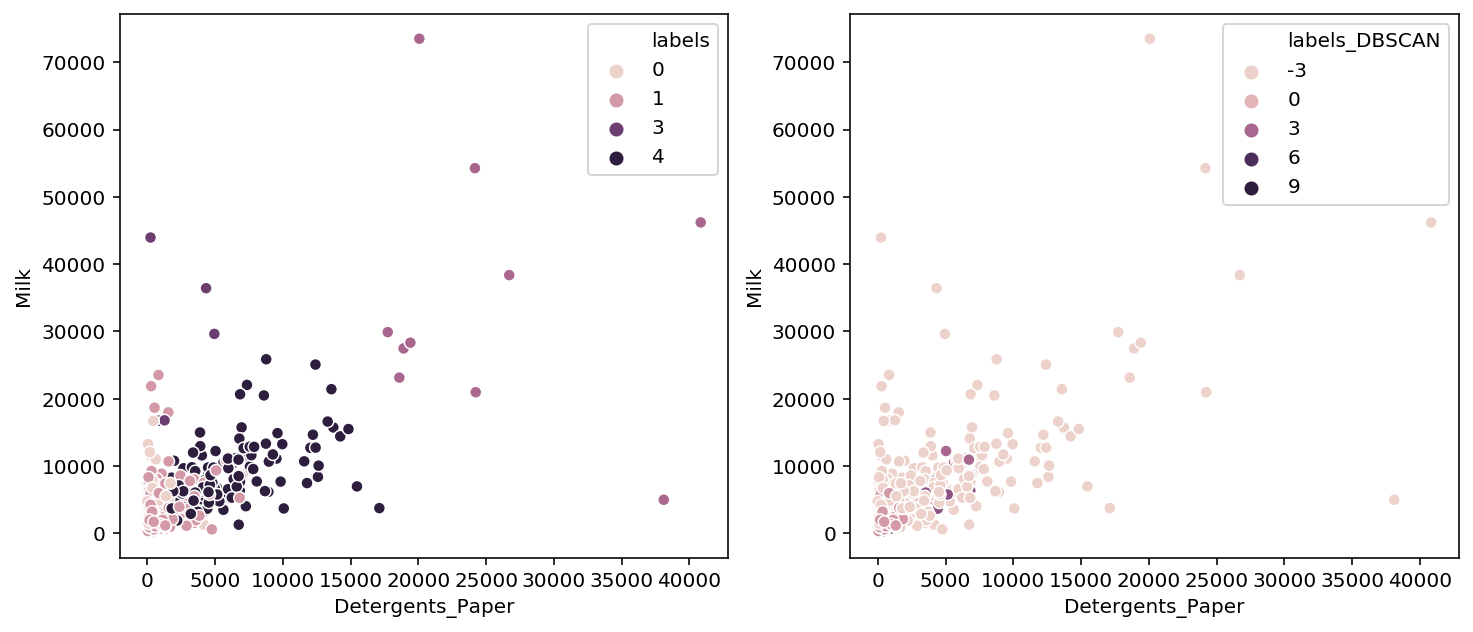

In [27]:
# Detergents_Paper as X and Milk as y

#import library
import seaborn as sns

fig,ax = plt.subplots(figsize=(12,5))

# plot by labels
plt.subplot(1,2,1)
ax = sns.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels', data=customers)

# plot by labels_DBSCA
plt.subplot(1,2,2)
ax = sns.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels_DBSCAN', data=customers)




Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

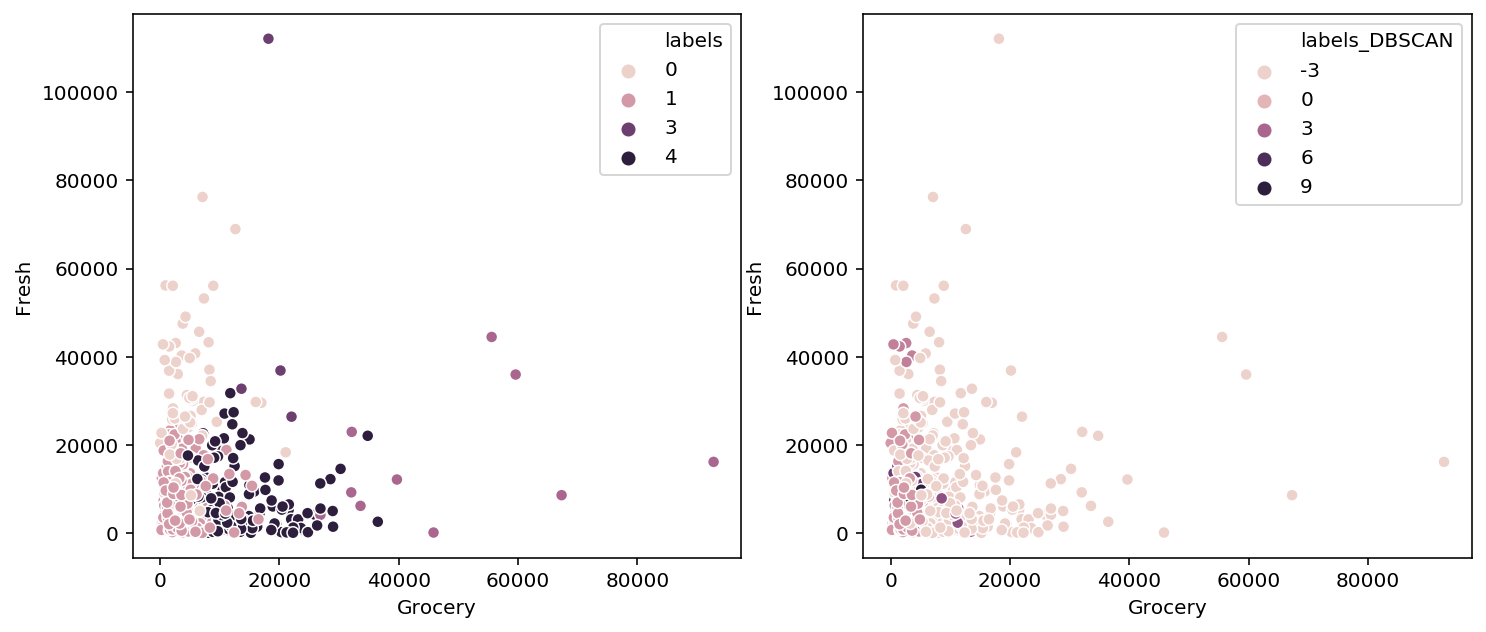

In [28]:
# Grocery as X and Fresh as y

fig,ax = plt.subplots(figsize=(12,5))

# plot by labels
plt.subplot(1,2,1)
ax = sns.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels', data=customers)

# plot by labels_DBSCA
plt.subplot(1,2,2)
ax = sns.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels_DBSCAN', data=customers)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

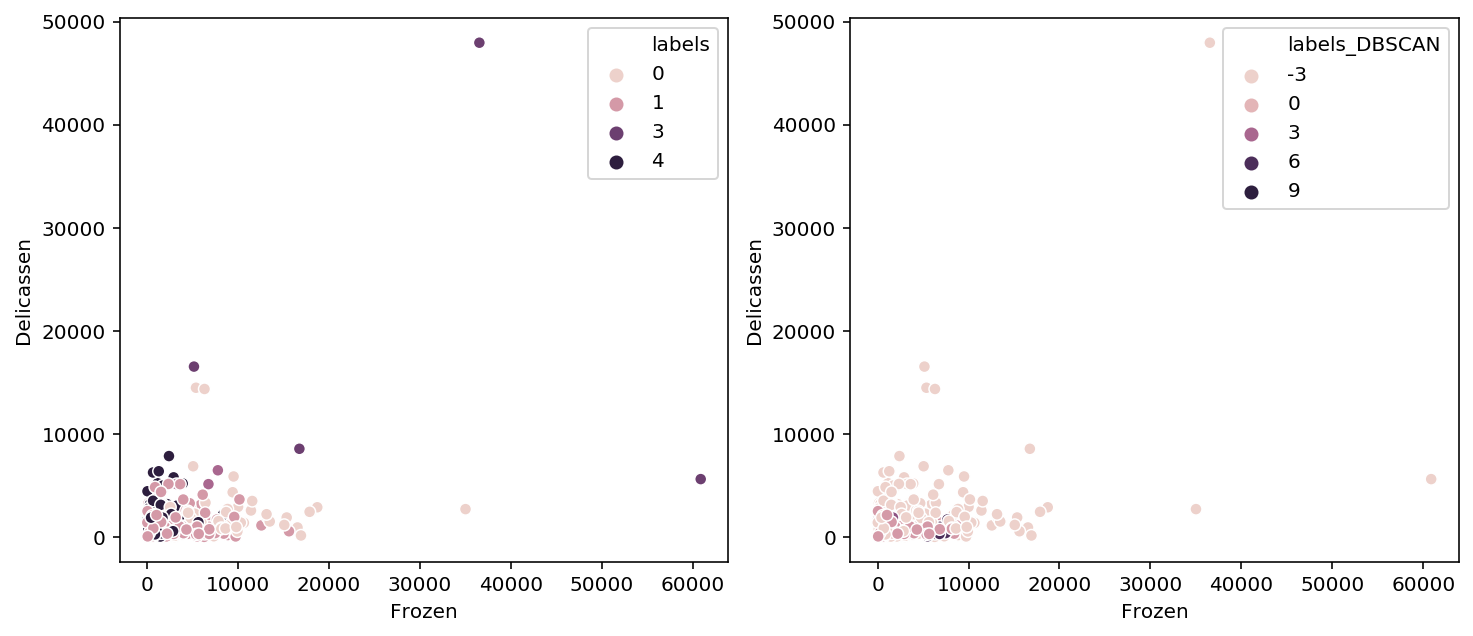

In [29]:
# Frozen as X and Delicassen as y

fig,ax = plt.subplots(figsize=(12,5))

# plot by labels
plt.subplot(1,2,1)
ax = sns.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels', data=customers)

# plot by labels_DBSCA
plt.subplot(1,2,2)
ax = sns.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels_DBSCAN', data=customers)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [31]:
# group by labels
customers.groupby(['labels']).mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.044118,2.705882,30290.529412,3970.838235,4702.735294,7171.264706,624.470588,2052.235294,-0.455882
1,1.000000,2.452174,8136.821739,2943.582609,3576.352174,2298.434783,826.547826,988.260870,0.965217
2,2.000000,2.500000,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,-1.000000
3,1.250000,2.750000,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,-1.000000
4,2.000000,2.617188,7665.382812,8823.804688,14038.148438,1449.343750,6060.460938,1531.546875,-0.531250


In [32]:
customers.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,2.172549
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,4.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.915385
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,4.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,4.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
'''
I really don't know how to evaluate it.
'''

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here